# (Step 1 for PTE) Find cyclone track from minimum surface pressure

Christoph Braun, KIT, IMK-TRO, June 2022

Based on a script by Hilke Lentink

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

In [2]:
#####################################################
# cyclone specific data
#####################################################
res = '2km'
exp ='channel_'+res+'_0005'

data_dt   = '6hrly'
data_res  = '025x025latlon'

In [3]:
####################################################
# load data
#####################################################
# File to read in

datapath='/scratch/b/b380782/check_remapping_on_PTE/'+exp+'/'
# datapath='/work/bb1152/Module_A/A6_CyclEx/sim_data/production/'

ipath2d   = datapath+"remapped_atm2d_latlon_025x025/"
#ipath2d   = datapath+exp+"/remapped_atm2d_latlon/"
ifile2d   = "icon-atm2d_ML_reg_con_202101*.nc"

# Read in variables
ncdat      = xr.open_mfdataset(ipath2d+ifile2d)

# File to save figures/output 
dataout=datapath+'PTE_out/'
#dataout='/work/bb1152/Module_A/A6_CyclEx/b382037_TingChen/Task3/PTE/'

In [4]:
# select timesteps every 6 hours. 
# Not required for 2km simulations because here pp_data is only available every 6 hours

def createList(r1, r2, r3):
    return list(range(r1, r2+1, r3))

if res == '80km' and data_dt  == '6hrly':
   ncdat = ncdat.isel(time=createList(0, 216, 6))
   

In [5]:
# set relative time-axis

ncdat["time"] = ncdat.time - 20210101

In [6]:
# select subdomain without meridional boundaries

latmin = 10
latmax = 80

ncdat = ncdat.sel(lat=slice(latmin,latmax))

In [7]:
ncdat

<xarray.Dataset>
Dimensions:        (time: 37, lon: 204, lat: 281, height: 1, height_2: 1,
                    plev: 1, bnds: 2, plev_2: 1, plev_3: 1, depth: 8)
Coordinates:
  * time           (time) float64 0.0 0.25 0.5 0.75 1.0 ... 8.25 8.5 8.75 9.0
  * lon            (lon) float64 12.5 12.75 13.0 13.25 ... 62.5 62.75 63.0 63.25
  * lat            (lat) float64 10.0 10.25 10.5 10.75 ... 79.25 79.5 79.75 80.0
  * height         (height) float64 10.0
  * height_2       (height_2) float64 2.0
  * plev           (plev) float64 0.0
  * plev_2         (plev_2) float64 400.0
  * plev_3         (plev_3) float64 800.0
  * depth          (depth) float64 5.0 20.0 60.0 ... 1.62e+03 4.86e+03 1.458e+04
Dimensions without coordinates: bnds
Data variables: (12/40)
    plev_bnds      (time, plev, bnds) float64 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    plev_2_bnds    (time, plev_2, bnds) float64 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    plev_3_bnds    (time, plev_3, bnds) float64 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    depth_bnds     (time, depth, bnds) float64 dask.array<chunksize=(1, 8, 2), meta=np.ndarray>
    pres_msl       (time, lat, lon) float32 dask.array<chunksize=(1, 281, 204), meta=np.ndarray>
    pres_sfc       (time, lat, lon) float32 dask.array<chunksize=(1, 281, 204), meta=np.ndarray>
    ...             ...
    tqi            (time, lat, lon) float32 dask.array<chunksize=(1, 281, 204), meta=np.ndarray>
    tqr            (time, lat, lon) float32 dask.array<chunksize=(1, 281, 204), meta=np.ndarray>
    shfl_s         (time, lat, lon) float32 dask.array<chunksize=(1, 281, 204), meta=np.ndarray>
    lhfl_s         (time, lat, lon) float32 dask.array<chunksize=(1, 281, 204), meta=np.ndarray>
    qhfl_s         (time, lat, lon) float32 dask.array<chunksize=(1, 281, 204), meta=np.ndarray>
    w_so           (time, depth, lat, lon) float32 dask.array<chunksize=(1, 8, 281, 204), meta=np.ndarray>
Attributes:
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    Conventions:               CF-1.6
    source:                    @
    institution:               Max Planck Institute for Meteorology/Deutscher...
    title:                     ICON simulation
    history:                   Thu Apr 27 06:35:57 2023: cdo -P 32 remapcon,/...
    references:                see MPIM/DWD publications
    comment:                   Nicole Knopf (b380906) on l30144 (Linux 4.18.0...
    cdo_openmp_thread_number:  32
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [8]:
time       = ncdat.variables['time'][:]
lon        = ncdat.variables['lon'][:]
lat        = ncdat.variables['lat'][:]
pmsl       = ncdat.variables['pres_msl'][:] / 100. # surface pressure in hPa

In [9]:
# Dimensions
nx = len(lon)
ny = len(lat)
nt = len(time)

In [10]:
# Longitude, latitude issures
lon2d = np.empty((ny,nx), float)
lat2d = np.empty((ny,nx), float)

for i in range(ny):
    lon2d[i,:] = lon
for i in range(nx):
    lat2d[:,i] = lat
    
print('lon=',lon)
print('lat=',lat)

lon= <xarray.IndexVariable 'lon' (lon: 204)>
array([12.5 , 12.75, 13.  , ..., 62.75, 63.  , 63.25])
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X
lat= <xarray.IndexVariable 'lat' (lat: 281)>
array([10.  , 10.25, 10.5 , ..., 79.5 , 79.75, 80.  ])
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y


In [11]:
# search of the minimum pressure starts in a box around the start lon/lat
# here: use entire domain. In case track does not look reasonable, refinement may be required.

#start_lon = (ncdat.lon.min()+ncdat.lon.max()).values/2
#start_lat = (ncdat.lat.min()+ncdat.lat.max()).values/2

#boxsize_lon = (ncdat.lon.max()-ncdat.lon.min()).values #size of the box in degrees
#boxsize_lat = (ncdat.lat.max()-ncdat.lat.min()).values #size of the box in degrees

# To avoid identifying the early-staged cyclone center near the sounthern boundary, I constrain the search as below:

start_lon = lon[int(nx/2)].values
start_lat = lat[int(ny/2)].values
boxsize_lon = (ncdat.lon.max()-ncdat.lon.min()).values
boxsize_lat = (ncdat.lat.max()-ncdat.lat.min()).values*2/3

In [12]:
#####################################################
# Find minimum pressure
#####################################################
pmin   = np.empty(nt, float)
lonmin = np.empty(nt, float)
latmin = np.empty(nt, float)

boxcent_lon = start_lon
boxcent_lat = start_lat

for t in range(nt):

# select area of the box around a given lat/lon
    lonW = boxcent_lon - boxsize_lon/2
    lonE = boxcent_lon + boxsize_lon/2
    latS = boxcent_lat - boxsize_lat/2
    latN = boxcent_lat + boxsize_lat/2
    
    pmsl_box = np.where((lon2d>lonW) & (lon2d<lonE) & (lat2d>latS) & (lat2d<latN), pmsl[t,:,:], np.nan)

# find minimum pressure and corresponding coordinates in the box
    pmin[t]   = np.nanmin(pmsl_box)
    lonmin[t] = np.nanmax( np.where(pmsl_box == pmin[t], lon2d, np.nan) )
    latmin[t] = np.nanmax( np.where(pmsl_box == pmin[t], lat2d, np.nan) )
    
trackinfo = {"time" : time, "pmin" : pmin, "lon" : lonmin, "lat" : latmin}
df = pd.DataFrame(trackinfo, columns= ['time', 'pmin', 'lon', 'lat'])


df2= df[df["time"] >= 1.5]

df2


time        pmin    lon    lat
6   1.50  997.546692  36.25  44.00
7   1.75  996.248657  43.75  43.00
8   2.00  995.287598  48.50  44.25
9   2.25  992.571960  53.50  44.00
10  2.50  988.541199  57.50  44.75
11  2.75  982.179688  61.75  45.75
12  3.00  977.645264  18.50  45.00
13  3.25  973.324219  22.00  46.25
14  3.50  968.580139  24.75  47.00
15  3.75  963.109375  26.75  47.00
16  4.00  961.238098  34.75  48.50
17  4.25  959.273499  38.50  49.00
18  4.50  955.893311  46.50  49.00
19  4.75  950.388855  52.75  49.00
20  5.00  944.334473  56.00  49.75
21  5.25  940.405945  57.25  49.25
22  5.50  935.754517  14.00  50.75
23  5.75  937.536377  14.50  49.50
24  6.00  937.546631  24.75  51.50
25  6.25  937.565063  26.50  52.00
26  6.50  942.418457  35.25  51.00
27  6.75  940.635559  37.75  51.75
28  7.00  942.385132  38.00  52.50
29  7.25  945.292175  49.00  50.75
30  7.50  950.658508  56.25  49.00
31  7.75  953.673889  57.25  49.75
32  8.00  959.765259  14.50  48.00
33  8.25  958.518616  31.00  45.75
34  8.50  954.275574  42.25  46.25
35  8.75  949.302429  48.00  48.00
36  9.00  945.325684  51.25  49.50

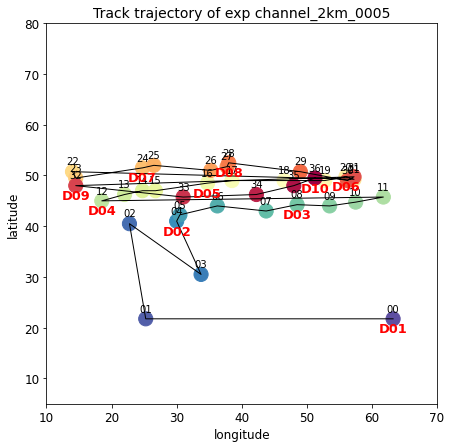

In [13]:
#####################################################
# Plot pmin track
#####################################################
plt.rcParams['savefig.facecolor']='white'
fig = plt.figure(figsize=(7, 7))
plt.plot(df['lon'], df['lat'], '-', linewidth=1, color='k', label=exp)
plt.scatter(df['lon'], df['lat'], s=200, c=df.time, cmap='Spectral_r')
xs = df['lon'].to_numpy()
ys = df['lat'].to_numpy()
time = df['time'].to_numpy()
for j in range(0,len(xs)):
    plt.text(xs[j], ys[j]+2, ''+str('{:02.0f}'.format(j))+'', ha='center',va='center',fontsize=10, zorder=1000)
for j in range(0,len(xs),4):
    plt.text(xs[j], ys[j]-2, 'D'+str('{:02.0f}'.format(int(time[j]+1)))+'', ha='center',va='center',color='red',fontsize=13, weight='bold',zorder=1000)
plt.xlim([lon[0], lon[-1]])
plt.ylim([lat[0], lat[-1]])
plt.xlim(10, 70)
plt.ylim(5, 80)
plt.xlabel('longitude',fontsize=12)
plt.ylabel('latitude',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Track trajectory of exp '+exp+'', fontsize=14)

fig.savefig(dataout+'cyclonetracks_' + exp + '.png', bbox_inches='tight',dpi=100)


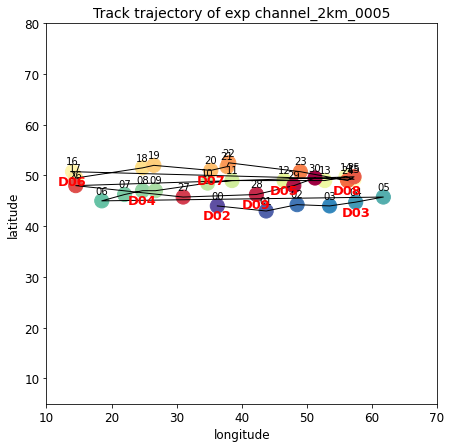

In [14]:
#####################################################
# Plot pmin track
#####################################################
plt.rcParams['savefig.facecolor']='white'
fig = plt.figure(figsize=(7, 7))
plt.plot(df2['lon'], df2['lat'], '-', linewidth=1, color='k', label=exp)
plt.scatter(df2['lon'], df2['lat'], s=200, c=df2.time, cmap='Spectral_r')
xs = df2['lon'].to_numpy()
ys = df2['lat'].to_numpy()
time = df2['time'].to_numpy()
for j in range(0,len(xs)):
    plt.text(xs[j], ys[j]+2, ''+str('{:02.0f}'.format(j))+'', ha='center',va='center',fontsize=10, zorder=1000)
for j in range(0,len(xs),4):
    plt.text(xs[j], ys[j]-2, 'D'+str('{:02.0f}'.format(int(time[j]+1)))+'', ha='center',va='center',color='red',fontsize=13, weight='bold',zorder=1000)
plt.xlim([lon[0], lon[-1]])
plt.ylim([lat[0], lat[-1]])
plt.xlim(10, 70)
plt.ylim(5, 80)
plt.xlabel('longitude',fontsize=12)
plt.ylabel('latitude',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Track trajectory of exp '+exp+'', fontsize=14)

fig.savefig(dataout+'Cyclonetracks_' + exp + '_remove1p5days.png', bbox_inches='tight',dpi=100)


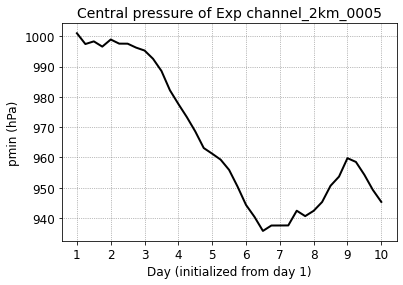

In [15]:
#####################################################
# Plot pmin vs. time
#####################################################
fig = plt.figure(figsize=(6, 4))
plt.plot(df['time'], df['pmin'],     color='k', linewidth=2, label=exp)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Day (initialized from day 1)',fontsize=12)
plt.ylabel('pmin (hPa)',fontsize=12)
plt.xticks(np.arange(0,10,1),np.arange(1,11,1))
#plt.xticklabels(np.arange(1,10,1))
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('Central pressure of Exp '+exp+'', fontsize=14)
fig.savefig(dataout+'Centralpressure' + exp + '.png', bbox_inches='tight',dpi=100)

In [17]:
#####################################################
# Write out track data
#####################################################


df.to_csv(dataout+"/cyclone_tracks/Track_for_"+exp+"_"+data_dt+"_"+data_res+".csv", header=True)

del time,lon,lat,pmsl,lon2d,lat2d,ncdat,df